In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/Dataset .csv'
data = pd.read_csv(file_path)

In [3]:
# Handle missing values in the 'Cuisines' column by imputing with 'Unknown'
data['Cuisines'].fillna('Unknown', inplace=True)

In [4]:
# Select categorical columns to encode
categorical_columns = ['Restaurant Name', 'City', 'Locality', 'Cuisines',
                       'Currency', 'Has Table booking', 'Has Online delivery',
                       'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [5]:
# Select the features (exclude 'Restaurant ID', 'Address', 'Locality Verbose', and 'Aggregate rating')
features = data_encoded.drop(columns=['Restaurant ID', 'Address', 'Locality Verbose', 'Aggregate rating'])
target = data_encoded['Aggregate rating']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 103093549870.6095
R-squared: -45293766821.911156


In [9]:
# Get the coefficients of the features
coefficients = model.coef_
feature_importance = pd.Series(coefficients, index=features.columns).sort_values(ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
 Currency_Emirati Diram(AED)    1.866724e+06
Currency_Pounds(��)            1.621394e+06
Currency_Turkish Lira(TL)      1.199050e+06
City_Des Moines                1.195815e+06
City_Orlando                   1.189334e+06
                                   ...     
Restaurant Name_Mr.           -1.651022e+06
City_Macedon                  -1.651022e+06
Cuisines_Modern Australian    -1.981185e+06
Currency_Brazilian Real(R$)   -2.698596e+06
Currency_Indian Rupees(Rs.)   -4.581254e+06
Length: 10647, dtype: float64


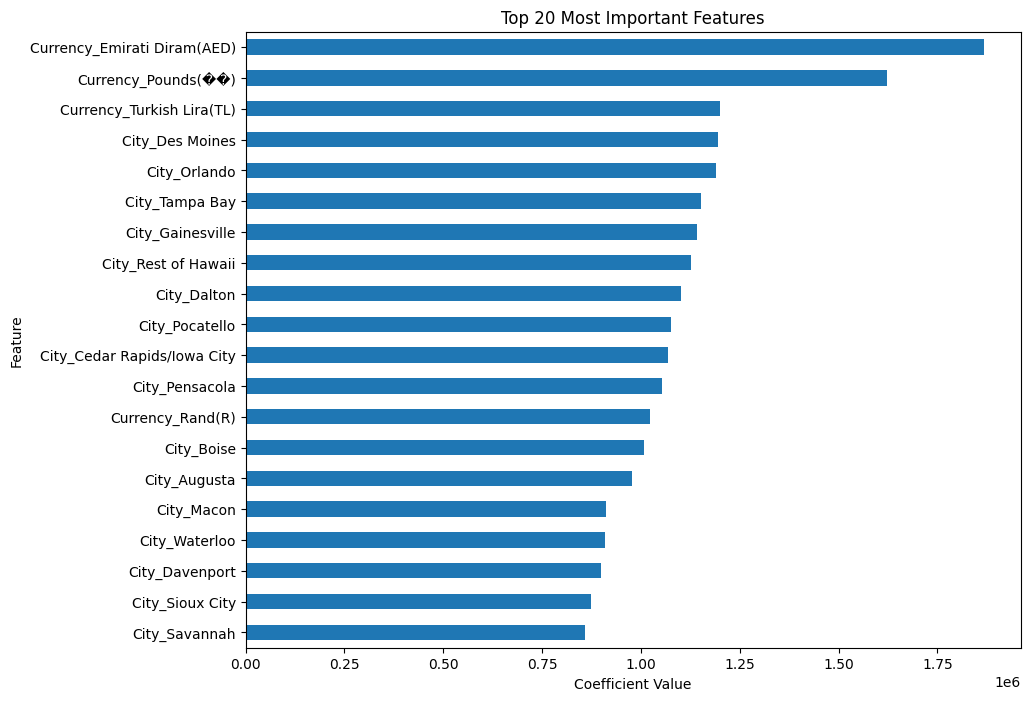

In [10]:
# Plot the top 20 most important features
top_features = feature_importance.head(20)

plt.figure(figsize=(10, 8))
top_features.plot(kind='barh')
plt.title('Top 20 Most Important Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()